### For generating correlations from data

In [4]:
pip install gekko

     |████████████████████████████████| 14.1 MB 193 kB/s eta 0:00:01    |████████████████████▍           | 9.0 MB 693 kB/s eta 0:00:08
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade gekko


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### generate cubic supline and seek maximum and minimum value of cubic supline

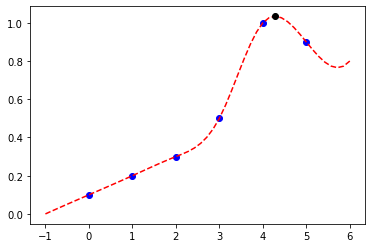

In [16]:
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

from gekko import GEKKO

m = GEKKO()
m.x = m.Param(value=np.linspace(-1,6)) # you can extend the domain for extrapolation
m.y = m.Var()
m.cspline(m.x,m.y,xm,ym)
m.options.IMODE=2
m.solve(disp=False)

p = GEKKO()
p.x = p.Var(value=1,lb=0,ub=5) # in order to create the bounds where the data is valid
p.y = p.Var()
p.Obj(-p.y) # need objective function to know where we need to maximize or minimize
p.cspline(p.x,p.y,xm,ym)
p.solve(disp=False)


plt.plot(xm,ym,'bo',label='data')
plt.plot(m.x,m.y,'r--',label='cubic spline')
plt.plot(p.x,p.y,'ko',label='maximum')


In [17]:
!pip install scipy

### cubic interpolation using Scipy (scientific python library) library

In [20]:
from scipy import interpolate 

def cubicinterpolation():
    x_pts = np.linspace(0,2*np.pi,10) # 10 equidistant coords from 0 to 10
    y_pts = np.sin(x_pts)
    x_vals = np.linspace(0,2*np.pi,50) # 50 desired points

    splines = interpolate.splrep(x_pts,y_pts)
    y_vals = interpolate.splev(x_vals,splines) #cubic interpolation

    plt.plot(x_pts,y_pts,'o') # plot known data points
    plt.plot(x_vals,y_vals,'-x') # plot interpolated points
    plt.show()

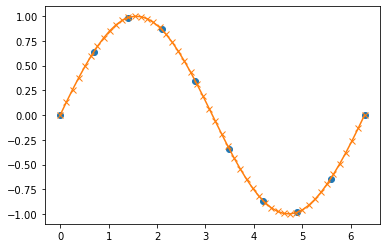

In [22]:
cubicinterpolation()

In [25]:
def cubicinterpolation1():
    x_pts = np.linspace(0,2*np.pi,10) # 10 equidistant coords from 0 to 10
    y_pts = np.sin(x_pts)
    x_vals = np.linspace(0,2*np.pi,50) # 50 desired points

    f = interpolate.interp1d(x_pts,y_pts,'cubic')
    y_vals = f(x_vals) #cubic interpolation

    plt.plot(x_pts,y_pts,'o') # plot known data points
    plt.plot(x_vals,y_vals,'-x') # plot interpolated points
    plt.show()

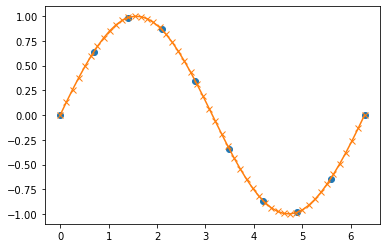

In [26]:
cubicinterpolation1()

# Scipy tutorial 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

# Optimization 

In [4]:
from scipy.optimize import minimize 

### Question 1 
 
Minimze $f(x) = (x-3)^2$ 

In [5]:
def f(x):
    return (x-3)**2
res = minimize(f, 2)  #(function,initial guess) 

In [9]:
res.x


array([2.99999999])

### returning an array. Why? we will look into it later 

### Question 2

Minimize $f(x,y) = (x-1)^2+(y-2.5)^2$
Subject to 

$x-2y+2 \ge 0$ <br>
$-x-2y+6 \ge 0$ <br>
$-x+2y+2 \ge 0$ <br>
$x \ge 0$ <br>
$y \ge 0$

- 2D function in vector x
- Constraintss must be specified as $g_i(x) \ge 0$
- Bounds specified as rectangular 

In [12]:
f = lambda x : (x[0] - 1)**2 + (x[1] - 2.5)**2 
# cons must be in tuples of dictionaries form 
cons = ({'type':'ineq','fun':lambda x: x[0] - 2 * x[1] + 2 },
       {'type':'ineq','fun':lambda x: -x[0] - 2 * x[1] + 6 },
       {'type':'ineq','fun':lambda x: -x[0] + 2 * x[1] + 2 })
bnds = ((0,None),(0,None))  
# means x goes from 0 to infinity as y also goes from 0 to infinity

res = minimize(f,(2,0),bounds=bnds,constraints=cons)

In [14]:
res.x

array([1.4, 1.7])

### So here's why it is returning as an array because if we have function of multiple variables it will return it in an array by defualt

In [ ]:
# use 
minimize? # for details

# Interpolation

Suppose you have the following data 

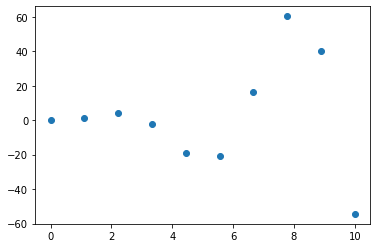

In [16]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [18]:
from scipy.interpolate import interp1d

In [20]:
f  = interp1d(x,y,kind = 'cubic')
x_pred = np.linspace(0,10,100)
y_pred = f(x_pred)

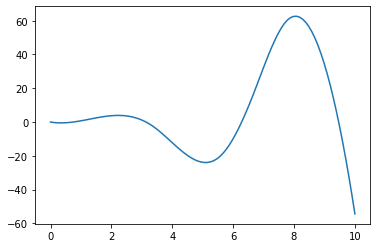

In [21]:
plt.plot(x_pred,y_pred)

# Curve Fitting
### Sometimes we have specific data that we collect from some source and we want to fit it to a specific function form. For Example

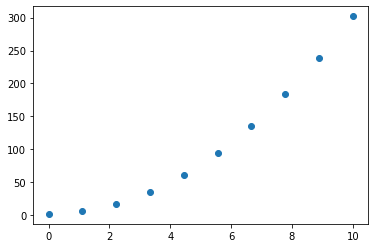

In [22]:
x_data = np.linspace(0,10,10)
y_data = 3 * x_data**2 +2
plt.scatter(x_data,y_data)

### Question
Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of a and b 

In [24]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

In [25]:
popt

array([3., 2.])